In [4]:
import preprocessing

import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import StratifiedKFold

import numpy as np
import os
import re
import pickle as pkl
import collections
import codecs
from functools import reduce

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
preprocessing.load_data()
preprocessing.process_content()

In [6]:
with open('/Users/luu22/Desktop/fake-real-news/pickle/processed.pickle', 'rb') as f:
    data = pkl.load(f)
    contents = data['contents']
    labels = data['labels']

In [7]:
vocabulary_size = 20000

all_words = reduce(lambda w1, w2: w1 + w2, contents)
word_num = len(all_words)
print('There are {} words in the dataset'.format(word_num))

count = [['UNK', -1]]
count.extend(collections.Counter(all_words).most_common(vocabulary_size - 1))

There are 1304658 words in the dataset


In [8]:
count

[['UNK', -1],
 ('trump', 10439),
 ('said', 9804),
 ('clinton', 8893),
 ('state', 7501),
 ('u', 6460),
 ('would', 5847),
 ('one', 5728),
 ('people', 5657),
 ('year', 4875),
 ('new', 4596),
 ('republican', 4514),
 ('time', 4373),
 ('president', 4361),
 ('obama', 4289),
 ('american', 3971),
 ('also', 3942),
 ('campaign', 3932),
 ('hillary', 3641),
 ('like', 3422),
 ('say', 3395),
 ('election', 3384),
 ('party', 3244),
 ('could', 3154),
 ('even', 3080),
 ('country', 2776),
 ('right', 2767),
 ('many', 2764),
 ('two', 2741),
 ('government', 2726),
 ('day', 2710),
 ('candidate', 2705),
 ('first', 2692),
 ('political', 2575),
 ('get', 2571),
 ('make', 2538),
 ('house', 2464),
 ('way', 2455),
 ('white', 2372),
 ('world', 2328),
 ('voter', 2305),
 ('news', 2227),
 ('vote', 2162),
 ('know', 2153),
 ('percent', 2153),
 ('going', 2148),
 ('think', 2144),
 ('sander', 2095),
 ('donald', 2091),
 ('last', 2085),
 ('war', 2061),
 ('may', 2053),
 ('presidential', 2041),
 ('want', 2022),
 ('democratic', 1

In [9]:
dictionary = dict()
for word, _ in count:
    dictionary[word] = len(dictionary)
    
dictionary

{'UNK': 0,
 'trump': 1,
 'said': 2,
 'clinton': 3,
 'state': 4,
 'u': 5,
 'would': 6,
 'one': 7,
 'people': 8,
 'year': 9,
 'new': 10,
 'republican': 11,
 'time': 12,
 'president': 13,
 'obama': 14,
 'american': 15,
 'also': 16,
 'campaign': 17,
 'hillary': 18,
 'like': 19,
 'say': 20,
 'election': 21,
 'party': 22,
 'could': 23,
 'even': 24,
 'country': 25,
 'right': 26,
 'many': 27,
 'two': 28,
 'government': 29,
 'day': 30,
 'candidate': 31,
 'first': 32,
 'political': 33,
 'get': 34,
 'make': 35,
 'house': 36,
 'way': 37,
 'white': 38,
 'world': 39,
 'voter': 40,
 'news': 41,
 'vote': 42,
 'know': 43,
 'percent': 44,
 'going': 45,
 'think': 46,
 'sander': 47,
 'donald': 48,
 'last': 49,
 'war': 50,
 'may': 51,
 'presidential': 52,
 'want': 53,
 'democratic': 54,
 'take': 55,
 'policy': 56,
 'much': 57,
 'told': 58,
 'law': 59,
 'well': 60,
 'email': 61,
 'united': 62,
 'medium': 63,
 'group': 64,
 'america': 65,
 'back': 66,
 'week': 67,
 'support': 68,
 'national': 69,
 'go': 70,


In [10]:
    for i, content in enumerate(contents):
        for word_idx, word in enumerate(content):
            if word in dictionary:
                index = dictionary[word]
            else:  # the word is considered as infrequent, represent using UNKNOWN
                index = 0
            contents[i][word_idx] = index

In [11]:
X = contents
y = data['labels']

In [12]:
print('---review---')
print(X[0])
print('---label---')
print(y[0])

---review---
[112, 4587, 5, 5571, 1086, 1758, 1343, 795, 1, 375, 6125, 10, 1578, 405, 10847, 94, 7281, 3530, 162, 4, 483, 1286, 115, 703, 471, 125, 470, 822, 0, 2235, 62, 4, 1758, 1343, 108, 937, 8887, 5571, 1086, 5, 1914, 552, 62, 8505, 740, 77, 29, 13, 1393, 48, 1, 567, 291, 2345, 3967, 1893, 94, 1979, 911, 16294, 165, 291, 2345, 2718, 3805, 96, 94, 0, 483, 1286, 5836, 418, 1192, 5572, 1105, 1333, 778, 3531, 69, 113, 256, 10847, 1241, 1611, 5571, 1086, 7, 16295, 344, 112, 578, 39, 10847, 403, 1369, 595, 339, 113, 94, 1759, 3531, 125, 1459, 4842, 5571, 1086, 10, 5, 713, 796, 3621, 596, 1700, 8506, 1086, 108, 137, 1879, 113, 256, 568, 427, 6851, 4279, 32, 543, 5571, 1086, 5705, 12371, 39, 94, 994, 12372, 498, 54, 29, 1932, 7055, 116, 2392, 1086, 667, 1612, 108, 543, 125, 3307, 1460, 18568, 86, 3531, 988, 7056, 2999, 130, 1339, 543, 5571, 1086, 94, 567, 774, 3390, 1086, 2934, 3268, 108, 12372, 498, 29, 849, 15, 330, 483, 363, 0, 6852, 2058, 1430, 116, 5350, 1993, 229, 19, 1932, 4665, 17

In [13]:
print('Maximum news length: {}'.format(
len(max((X), key=len))))

Maximum news length: 10290


In [14]:
print('Minimum news length: {}'.format(
len(min((X), key=len))))

Minimum news length: 2


In [15]:
lens = [len(s) for s in X]
print("average length: %0.1f" % np.mean(lens))

average length: 434.9


In [16]:
len(X)

3000

In [110]:
from keras.preprocessing import sequence

# limit the maximum review length to max_words by truncating longer news and padding shorter news with a null value (0). 
max_words = 500
X_train = sequence.pad_sequences(X, maxlen=max_words)

### A simple Word2Vec CBOW model

In [111]:
from keras.layers import Dense, Input, Flatten
from keras.layers import GlobalAveragePooling1D, Embedding
from keras.models import Model
from keras.utils.np_utils import to_categorical

EMBEDDING_DIM = 50

# input: a sequence of MAX_SEQUENCE_LENGTH integers
def create_model():
    sequence_input = Input(shape=(max_words,))

    embedding_layer = Embedding(20000, EMBEDDING_DIM,
                            input_length=max_words,
                            trainable=True)
    embedded_sequences = embedding_layer(sequence_input)

    average = GlobalAveragePooling1D()(embedded_sequences)
    predictions = Dense(2, activation='softmax')(average)

    model = Model(sequence_input, predictions)
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam', 
                  metrics=['acc'])
    return model

In [112]:
score_lst1 = []

In [103]:
kfold = StratifiedKFold(n_splits=10, shuffle=True)

i = 0
y = np.array(y)
y_train = to_categorical(np.asarray(y))
cv_score = []


for train, test in kfold.split(X_train, y):
    model = create_model()
#     model.summary()
    print(X_train[0].shape)
    
    i += 1
    print("Running Fold", i, "/", 10)
    model.fit(X_train[train], y_train[train], batch_size=64, epochs=10, verbose=1)
    print("cross_validation score: ", model.evaluate(X_train[test], y_train[test], verbose=0)[1])
    cv_score.append(model.evaluate(X_train[test], y_train[test], verbose=0)[1])
score_lst1.append(sum(cv_score) / 10)

(150,)
Running Fold 1 / 10
Epoch 1/10
2700/2700 [==============================] - 17s 6ms/step - loss: 0.6819 - acc: 0.6830
Epoch 2/10
2700/2700 [==============================] - 1s 441us/step - loss: 0.6454 - acc: 0.8189
Epoch 3/10
2700/2700 [==============================] - 1s 466us/step - loss: 0.5901 - acc: 0.8333
Epoch 4/10
2700/2700 [==============================] - 1s 521us/step - loss: 0.5230 - acc: 0.8641
Epoch 5/10
2700/2700 [==============================] - 1s 500us/step - loss: 0.4524 - acc: 0.8874
Epoch 6/10
2700/2700 [==============================] - 1s 422us/step - loss: 0.3888 - acc: 0.8993
Epoch 7/10
2700/2700 [==============================] - 1s 415us/step - loss: 0.3357 - acc: 0.9233
Epoch 8/10
2700/2700 [==============================] - 1s 414us/step - loss: 0.2914 - acc: 0.9319
Epoch 9/10
2700/2700 [==============================] - 1s 434us/step - loss: 0.2553 - acc: 0.9481
Epoch 10/10
2700/2700 [==============================] - 1s 481us/step - loss: 0.22

2700/2700 [==============================] - 1s 361us/step - loss: 0.2901 - acc: 0.9322
Epoch 9/10
2700/2700 [==============================] - 1s 368us/step - loss: 0.2545 - acc: 0.9407
Epoch 10/10
2700/2700 [==============================] - 1s 514us/step - loss: 0.2243 - acc: 0.9574
cross_validation score:  0.8600000007947286
(150,)
Running Fold 9 / 10
Epoch 1/10
2700/2700 [==============================] - 18s 7ms/step - loss: 0.6806 - acc: 0.6659
Epoch 2/10
2700/2700 [==============================] - 1s 386us/step - loss: 0.6407 - acc: 0.8000
Epoch 3/10
2700/2700 [==============================] - 1s 375us/step - loss: 0.5845 - acc: 0.8378
Epoch 4/10
2700/2700 [==============================] - 1s 403us/step - loss: 0.5155 - acc: 0.8696
Epoch 5/10
2700/2700 [==============================] - 1s 432us/step - loss: 0.4461 - acc: 0.8933
Epoch 6/10
2700/2700 [==============================] - 1s 462us/step - loss: 0.3844 - acc: 0.9037
Epoch 7/10
2700/2700 [===========================

In [138]:
score_lst1

[74.9, 79.8, 83.3, 87.6, 87.9]

### A more complex model : CNN - LSTM

In [113]:
from keras.layers import LSTM, Conv1D, MaxPooling1D, Dropout

def create_cnn_lstm():
    # input: a sequence of 1000 integers
    sequence_input = Input(shape=(max_words,), dtype='int32')
    embedding_layer = Embedding(20000, EMBEDDING_DIM,
                        input_length=max_words,
                        trainable=True)
    embedded_sequences = embedding_layer(sequence_input)

    # 1D convolution with 64 output channels
    x = Conv1D(64, 5)(embedded_sequences)
    # MaxPool divides the length of the sequence by 5
    x = MaxPooling1D(5)(x)
    x = Dropout(0.2)(x)
    x = Conv1D(64, 5)(x)
    x = MaxPooling1D(5)(x)
    # LSTM layer with a hidden size of 64
    x = Dropout(0.2)(x)
    x = LSTM(64)(x)
    predictions = Dense(2, activation='softmax')(x)

    model = Model(sequence_input, predictions)
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    return model

In [114]:
score_lst2 = []

In [119]:
kfold = StratifiedKFold(n_splits=10, shuffle=True)

i = 0
y = np.array(y)
y_train = to_categorical(np.asarray(y))
cv_score = []

for train, test in kfold.split(X_train, y):
    model = create_cnn_lstm()
#     model.summary()
    print(X_train[0].shape)
#     print(test)
    
    i += 1
    print("Running Fold", i, "/", 10)
    model.fit(X_train[train], y_train[train], batch_size=64, epochs=5, verbose=1)
    print("cross_validation score: ", model.evaluate(X_train[test], y_train[test], verbose=0)[1])
    cv_score.append(model.evaluate(X_train[test], y_train[test], verbose=0)[1])
score_lst2.append(sum(cv_score) / 10)

(500,)
Running Fold 1 / 10
Epoch 1/5
2700/2700 [==============================] - 27s 10ms/step - loss: 0.5986 - acc: 0.6596
Epoch 2/5
2700/2700 [==============================] - 7s 2ms/step - loss: 0.2624 - acc: 0.8874
Epoch 3/5
2700/2700 [==============================] - 7s 3ms/step - loss: 0.0949 - acc: 0.9544
Epoch 4/5
2700/2700 [==============================] - 9s 3ms/step - loss: 0.0509 - acc: 0.9826
Epoch 5/5
2700/2700 [==============================] - 9s 3ms/step - loss: 0.0243 - acc: 0.9922
cross_validation score:  0.8933333333333333
(500,)
Running Fold 2 / 10
Epoch 1/5
2700/2700 [==============================] - 28s 10ms/step - loss: 0.6065 - acc: 0.6722
Epoch 2/5
2700/2700 [==============================] - 8s 3ms/step - loss: 0.2801 - acc: 0.8767
Epoch 3/5
2700/2700 [==============================] - 7s 3ms/step - loss: 0.1043 - acc: 0.9600
Epoch 4/5
2700/2700 [==============================] - 7s 3ms/step - loss: 0.0617 - acc: 0.9715
Epoch 5/5
2700/2700 [=============

In [150]:
score_lst2

[80.69, 87.2, 89.47, 90.1, 90.02]

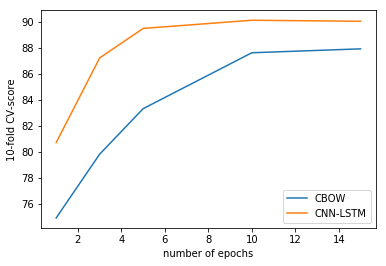

In [158]:
import matplotlib.pyplot as plt

epoch_num = [1, 3, 5, 10, 15]

plt.xlabel('number of epochs')
plt.ylabel('10-fold CV-score')
plt.plot(epoch_num, score_lst1, label='CBOW')
plt.plot(epoch_num, score_lst2, label='CNN-LSTM')
plt.legend()